In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime, timedelta

In [132]:
# 데이터 불러오기
plant1 = pd.read_csv('plant1_train_merge.csv')
plant2 = pd.read_csv('plant2_train_merge.csv')
test =  pd.read_csv('test.csv', index_col=0)

In [133]:
plant1_notnull = plant1.dropna(how='any')
plant2_notnull = plant2.dropna(how='any')

In [134]:
# 1, 0 비율
print('loc1 value counts\n')
print(plant1['plant1_train.cond_loc1'].value_counts())
print(plant1_notnull['plant1_train.cond_loc1'].value_counts(),'\n\n')

print('loc2 value counts\n')
print(plant1['plant1_train.cond_loc2'].value_counts())
print(plant1_notnull['plant1_train.cond_loc2'].value_counts(),'\n\n')

print('loc3 value counts\n')
print(plant1['plant1_train.cond_loc3'].value_counts())
print(plant1_notnull['plant1_train.cond_loc3'].value_counts(),'\n\n')

loc1 value counts

0.0    57604
1.0      275
Name: plant1_train.cond_loc1, dtype: int64
0.0    57579
1.0      275
Name: plant1_train.cond_loc1, dtype: int64 


loc2 value counts

0.0    58142
1.0      487
Name: plant1_train.cond_loc2, dtype: int64
0.0    57369
1.0      485
Name: plant1_train.cond_loc2, dtype: int64 


loc3 value counts

0.0    57959
1.0      645
Name: plant1_train.cond_loc3, dtype: int64
0.0    57226
1.0      628
Name: plant1_train.cond_loc3, dtype: int64 




In [135]:
def dewpoint(temp, humid):
    return ((243.12 *((17.62 * temp /(243.12 + temp))
                     + np.log(humid / 100.0))) / (17.62-((17.62 * temp / (243.12 + temp)) + np.log(humid/ 100.0))))

In [136]:
plant1.columns

Index(['plant1_train.mea_ddhr', 'plant1_train.tem_in_loc1',
       'plant1_train.hum_in_loc1', 'plant1_train.tem_coil_loc1',
       'plant1_train.tem_in_loc2', 'plant1_train.hum_in_loc2',
       'plant1_train.tem_coil_loc2', 'plant1_train.tem_in_loc3',
       'plant1_train.hum_in_loc3', 'plant1_train.tem_coil_loc3',
       'plant1_train.tem_out_loc1', 'plant1_train.hum_out_loc1',
       'plant1_train.cond_loc1', 'plant1_train.cond_loc2',
       'plant1_train.cond_loc3', 'datetime', 'datetime_24', 'temp_24',
       'hum_24', 'datetime_48', 'temp_48', 'hum_48'],
      dtype='object')

In [138]:
# plant1 학습 데이터셋

plant1_loc1_24 = plant1.iloc[:,[0,1,2,3,10,11, 12, 17,18,16]]
plant1_loc2_24 = plant1.iloc[:,[0,4,5,6,10,11, 13, 17,18,16]]
plant1_loc3_24 = plant1.iloc[:,[0,7,8,9,10,11, 14, 17,18,16]]

plant1_loc1_48 = plant1.iloc[:,[0,1,2,3,10,11, 12, 20,21,19]]
plant1_loc2_48 = plant1.iloc[:,[0,4,5,6,10,11, 13, 20,21,19]]
plant1_loc3_48 = plant1.iloc[:,[0,7,8,9,10,11, 14, 20,21,19]]

temp_df = plant1_loc1_24.iloc[:,[0,1,2,3,4,5]]
plant1_loc1_24 = plant1_loc1_24.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_24')
temp_df = plant1_loc2_24.iloc[:,[0,1,2,3,4,5]]
plant1_loc2_24 = plant1_loc2_24.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_24')
temp_df = plant1_loc3_24.iloc[:,[0,1,2,3,4,5]]
plant1_loc3_24 = plant1_loc3_24.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_24')

temp_df = plant1_loc1_48.iloc[:,[0,1,2,3,4,5]]
plant1_loc1_48 = plant1_loc1_48.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_48')
temp_df = plant1_loc2_48.iloc[:,[0,1,2,3,4,5]]
plant1_loc2_48 = plant1_loc2_48.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_48')
temp_df = plant1_loc3_48.iloc[:,[0,1,2,3,4,5]]
plant1_loc3_48 = plant1_loc3_48.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_48')

plant1_loc1_24.dropna(how='any', inplace=True)
plant1_loc2_24.dropna(how='any', inplace=True)
plant1_loc3_24.dropna(how='any', inplace=True)
plant1_loc1_48.dropna(how='any', inplace=True)
plant1_loc2_48.dropna(how='any', inplace=True)
plant1_loc3_48.dropna(how='any', inplace=True)

plant1_loc1_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant1_loc2_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant1_loc3_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant1_loc1_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant1_loc2_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant1_loc3_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']


plant1_24 = pd.concat([plant1_loc1_24, plant1_loc2_24, plant1_loc3_24])
plant1_48 = pd.concat([plant1_loc1_48, plant1_loc2_48, plant1_loc3_48])

# plant2 학습 데이터셋

plant2_loc1_24 = plant2.iloc[:,[0,1,2,3,10,11, 12, 17,18,16]]
plant2_loc2_24 = plant2.iloc[:,[0,1,2,3,10,11, 13, 17,18,16]]
plant2_loc3_24 = plant2.iloc[:,[0,1,2,3,10,11, 14, 17,18,16]]

plant2_loc1_48 = plant2.iloc[:,[0,1,2,3,10,11, 12, 20,21,19]]
plant2_loc2_48 = plant2.iloc[:,[0,1,2,3,10,11, 13, 20,21,19]]
plant2_loc3_48 = plant2.iloc[:,[0,1,2,3,10,11, 14, 20,21,19]]

temp_df = plant2_loc1_24.iloc[:,[0,1,2,3,4,5]]
plant2_loc1_24 = plant2_loc1_24.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_24')
temp_df = plant2_loc2_24.iloc[:,[0,1,2,3,4,5]]
plant2_loc2_24 = plant2_loc2_24.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_24')
temp_df = plant2_loc3_24.iloc[:,[0,1,2,3,4,5]]
plant2_loc3_24 = plant2_loc3_24.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_24')

temp_df = plant2_loc1_48.iloc[:,[0,1,2,3,4,5]]
plant2_loc1_48 = plant2_loc1_48.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_48')
temp_df = plant2_loc2_48.iloc[:,[0,1,2,3,4,5]]
plant2_loc2_48 = plant2_loc2_48.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_48')
temp_df = plant2_loc3_48.iloc[:,[0,1,2,3,4,5]]
plant2_loc3_48 = plant2_loc3_48.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_48')

plant2_loc1_24.dropna(how='any', inplace=True)
plant2_loc2_24.dropna(how='any', inplace=True)
plant2_loc3_24.dropna(how='any', inplace=True)
plant2_loc1_48.dropna(how='any', inplace=True)
plant2_loc2_48.dropna(how='any', inplace=True)
plant2_loc3_48.dropna(how='any', inplace=True)

plant2_loc1_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant2_loc2_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant2_loc3_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant2_loc1_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant2_loc2_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant2_loc3_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']

# LOC 병합
plant2_24 = pd.concat([plant2_loc1_24, plant2_loc2_24, plant2_loc3_24])
plant2_48 = pd.concat([plant2_loc1_48, plant2_loc2_48, plant2_loc3_48])


# plant 병합
plant_24 = pd.concat([plant1_24, plant2_24])
plant_48 = pd.concat([plant1_48, plant2_48])

In [139]:
plant_24

,today,temp_in,hum_in,temp_coil,temp_out,hum_out,target,temp_24,hum_24,datetime_24,nextday,temp_in_y,hum_in_y,temp_coil_y,temp_out_y,hum_out_y
0,2016-04-01 00:00:00,16.00,24.00,11.00,9.00,42.00,0.0,9.1,79.000000,2016-04-02 00:00:00,2016-04-02 00:00:00,15.00,41.00,12.00,10.00,57.00
1,2016-04-01 03:00:00,14.00,28.00,10.00,7.00,59.00,0.0,7.1,89.000000,2016-04-02 03:00:00,2016-04-02 03:00:00,14.00,41.00,10.00,10.00,54.00
2,2016-04-01 06:00:00,13.00,33.00,10.00,6.00,56.00,0.0,5.9,89.000000,2016-04-02 06:00:00,2016-04-02 06:00:00,13.00,38.00,11.00,9.00,52.00
3,2016-04-01 09:00:00,13.00,33.00,10.00,18.00,30.00,0.0,12.9,64.000000,2016-04-02 09:00:00,2016-04-02 09:00:00,14.00,41.00,11.00,17.00,37.00
4,2016-04-01 12:00:00,16.00,28.00,10.00,18.00,20.00,0.0,20.0,42.000000,2016-04-02 12:00:00,2016-04-02 12:00:00,17.00,35.00,13.00,22.00,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57764,2019-03-30 23:00:00,9.63,50.70,9.49,5.05,73.32,0.0,3.0,58.333333,2019-03-31 23:00:00,2019-03-31 23:00:00,9.18,35.96,9.22,4.72,50.98
57765,2019-03-30 23:10:00,9.63,50.76,9.45,5.12,74.05,0.0,3.0,58.611111,2019-03-31 23:10:00,2019-03-31 23:10:00,9.18,36.32,9.18,4.72,52.11
57766,2019-03-30 23:20:00,9.66,50.92,9.34,5.18,72.65,0.0,3.0,58.888889,2019-03-31 23:20:00,2019-03-31 23:20:00,9.24,36.51,9.22,4.66,51.01
57767,2019-03-30 23:30:00,9.45,51.47,9.34,5.24,70.91,0.0,3.0,59.166667,2019-03-31 23:30:00,2019-03-31 23:30:00,9.05,36.29,9.11,4.57,51.47


# DNN 모델

In [25]:
from keras_tqdm import TQDMNotebookCallback
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Activation

from keras.callbacks import EarlyStopping

from keras.models import load_model

In [94]:
# 24h 모델

x = plant_24.iloc[:,[1,2,3,4,5,6,7]]
y = plant_24.iloc[:,[10,11,12,13,14]]

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=777)

In [95]:
print(train_x.shape)
print(train_y.shape)

(241819, 7)
(241819, 5)


In [13]:
# callback 함수

es = EarlyStopping(patience=30)
tqdm = TQDMNotebookCallback()

In [54]:
# DNN 모델

model = Sequential()

model.add(Dense(units=256, activation='relu',input_dim=7))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=5, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

hist = model.fit(train_x, train_y, epochs=500, batch_size=4096, validation_data=[test_x,test_y], verbose=0, callbacks=[es, tqdm]) 

5.606328964233398


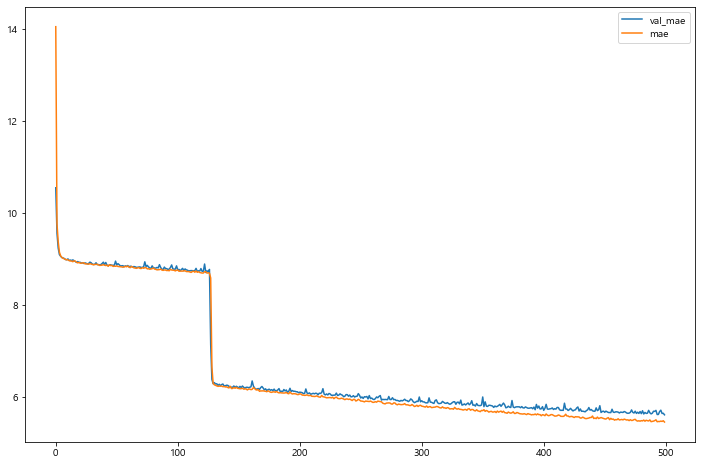

In [99]:
# model.add(Dense(units=256, activation='relu',input_dim=7))
# model.add(Dense(units=256, activation='relu'))
# model.add(Dense(units=256, activation='relu'))
# model.add(Dense(units=256, activation='relu'))
# model.add(Dense(units=5, activation='relu'))

print(min(hist.history['val_mae']))  # 2.43

plt.figure(figsize=(12,8))

plt.plot(hist.history['val_mae'], label='val_mae')
plt.plot(hist.history['mae'], label='mae')

plt.legend()

plt.show()

In [61]:
model.save('24h(2.434).h5')

In [105]:
# 48h 모델

x = plant1_48.iloc[:,[1,2,3,4,5,6,7]]
y = plant1_48.iloc[:,[10,11,12,13,14]]

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=777)

In [106]:
print(train_x.shape)  # (121092, 7)
print(train_y.shape)  # (121092, 5)

(121092, 7)
(121092, 5)


In [107]:
# callback 함수

es = EarlyStopping(patience=30)
tqdm = TQDMNotebookCallback()

In [108]:
# DNN 모델

model = Sequential()

model.add(Dense(units=256, activation='relu',input_dim=7))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=5, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

hist = model.fit(train_x, train_y, epochs=500, batch_size=2048, validation_data=[test_x,test_y], verbose=0, callbacks=[es, tqdm]) 

In [110]:
min(hist.history['val_mae'])  # 2.4719128608703613

2.4719128608703613

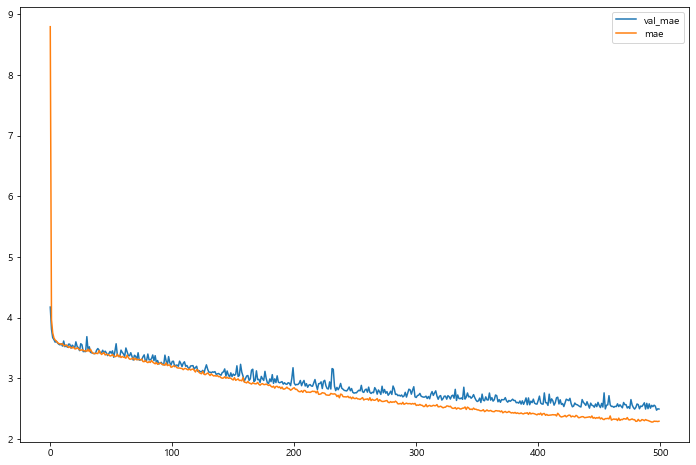

In [111]:
plt.figure(figsize=(12,8))

plt.plot(hist.history['val_mae'], label='val_mae')
plt.plot(hist.history['mae'], label='mae')

plt.legend()

plt.show()

In [112]:
model.save('48h(2.47).h5')

In [116]:
# 모델 load
model_24 = load_model('24h(2.434).h5')
model_48 = load_model('48h(2.47).h5')

# 결로 예측 모델

In [209]:
condensation_data = plant_24.iloc[:,1:7]
condensation_data

condensation_data['dewpoint'] = dewpoint(condensation_data['temp_in'], condensation_data['hum_in'])
condensation_data

,temp_in,hum_in,temp_coil,temp_out,hum_out,target,dewpoint
0,16.00,24.00,11.00,9.00,42.00,0.0,-4.590890
1,14.00,28.00,10.00,7.00,59.00,0.0,-4.250964
2,13.00,33.00,10.00,6.00,56.00,0.0,-2.921590
3,13.00,33.00,10.00,18.00,30.00,0.0,-2.921590
4,16.00,28.00,10.00,18.00,20.00,0.0,-2.525769
...,...,...,...,...,...,...,...
57764,9.63,50.70,9.49,5.05,73.32,0.0,-0.109046
57765,9.63,50.76,9.45,5.12,74.05,0.0,-0.092740
57766,9.66,50.92,9.34,5.18,72.65,0.0,-0.021595
57767,9.45,51.47,9.34,5.24,70.91,0.0,-0.067760


In [210]:
train_x, test_x, train_y, test_y = train_test_split(condensation_data.iloc[:,[0,1,2,3,4,6]], condensation_data.iloc[:,[5]], test_size=0.3, random_state=777)

In [ ]:
model = Sequential()

model.add(Dense(units=256, activation='relu', input_dim=6))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(train_x, train_y, epochs=500, batch_size=4096, validation_data=[test_x,test_y], verbose=0, callbacks=[es, tqdm]) 

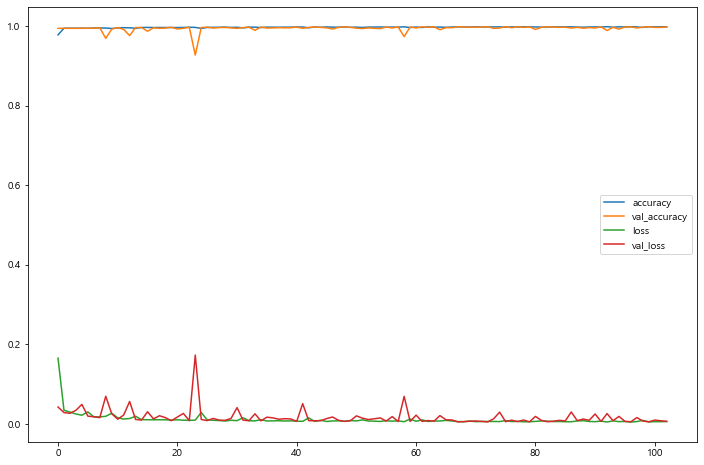

In [176]:
plt.figure(figsize=(12,8))

plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')

plt.legend()

plt.show()

In [180]:
pred_y = model.predict(test_x)

In [204]:
from sklearn.metrics import classification_report, confusion_matrix

In [198]:
test_y = np.array(test_y).reshape(-1,)
test_y

array([0., 0., 0., ..., 0., 0., 0.])

In [201]:
pred_y = pred_y.reshape(-1,)
pred_y = pred_y.astype('int')

In [203]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    103028
         1.0       0.00      0.00      0.00       610

    accuracy                           0.99    103638
   macro avg       0.50      0.50      0.50    103638
weighted avg       0.99      0.99      0.99    103638



In [205]:
confusion_matrix?

In [206]:
print(confusion_matrix(test_y, pred_y))

[[103028      0]
 [   610      0]]
